# Experiment 8 - MNIST Digit Classification using Keras  

## Problem Statement:
To build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset.

**Objective**:

Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.

## GitHub & Google Colab Link: 

GitHub Link: https://github.com/piyush-gambhir/ncu-lab-manual-and-end-semester-projects/blob/main/NCU-CSL312%20-%20DL%20-%20Lab%20Manual/Experiment%208/Experiment%208.ipynb

Google Colab Link:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/piyush-gambhir/ncu-lab-manual-and-end-semester-projects/blob/main/NCU-CSL312%20-%20DL%20-%20Lab%20Manual/Experiment%208/Experiment%208.ipynb)


## Installing Dependencies:

In [5]:
! pip install tabulate numpy pandas matplotlib seaborn torch torchvision

## Code

In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
from collections import OrderedDict

In [7]:


# Configuration
config = {
    'batch_size': 64,
    'n_epochs': 35,
    'lr': 0.0007,
    'dropout': 0.25,
    'input_size': 784,  # 28x28 images
    'hidden_sizes': [392, 196, 98, 49],
    'output_size': 10
}

In [8]:


# Data Preparation
def load_data():
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    train_ds = datasets.FashionMNIST('F_MNIST_data', download=True, train=True, transform=transform)
    test_ds = datasets.FashionMNIST('F_MNIST_data', download=True, train=False, transform=transform)

    # Split train set into training and validation set (80/20)
    num_train = len(train_ds)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(0.2 * num_train))
    train_idx, val_idx = indices[split:], indices[:split]

    # Creating data samplers and loaders
    train_sampler = SubsetRandomSampler(train_idx)
    val_sampler = SubsetRandomSampler(val_idx)
    
    train_dl = DataLoader(train_ds, batch_size=config['batch_size'], sampler=train_sampler)
    val_dl = DataLoader(train_ds, batch_size=config['batch_size'], sampler=val_sampler)
    test_dl = DataLoader(test_ds, batch_size=config['batch_size'], shuffle=True)

    return train_dl, val_dl, test_dl


In [9]:
# Model Architecture
def build_network():
    layers = OrderedDict([
        ('fc1', nn.Linear(config['input_size'], config['hidden_sizes'][0])),
        ('relu1', nn.ReLU()),
        ('drop1', nn.Dropout(config['dropout'])),
        ('fc2', nn.Linear(config['hidden_sizes'][0], config['hidden_sizes'][1])),
        ('relu2', nn.ReLU()),
        ('drop2', nn.Dropout(config['dropout'])),
        ('fc3', nn.Linear(config['hidden_sizes'][1], config['hidden_sizes'][2])),
        ('relu3', nn.ReLU()),
        ('drop3', nn.Dropout(config['dropout'])),
        ('fc4', nn.Linear(config['hidden_sizes'][2], config['hidden_sizes'][3])),
        ('relu4', nn.ReLU()),
        ('output', nn.Linear(config['hidden_sizes'][3], config['output_size'])),
        ('logsoftmax', nn.LogSoftmax(dim=1))
    ])
    model = nn.Sequential(layers)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    return model, device


In [10]:
# Training and Validation
def train_validate(model, device, train_dl, val_dl, n_epochs):
    loss_fn = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters(), lr=config['lr'])
    train_losses, val_losses = [], []

    for epoch in range(n_epochs):
        model.train()
        total_train_loss = 0
        for images, labels in train_dl:
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.shape[0], -1)
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_dl)
        train_losses.append(avg_train_loss)
        val_loss, val_acc = validate(model, device, val_dl, loss_fn)
        val_losses.append(val_loss)
        print(f'Epoch {epoch}: Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    plot_losses(train_losses, val_losses)

In [11]:



def validate(model, device, loader, loss_fn):
    total_loss, total_correct = 0, 0
    model.eval()
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.shape[0], -1)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item()
            total_correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()

    avg_loss = total_loss / len(loader)
    accuracy = 100 * total_correct / (len(loader) * config['batch_size'])
    return avg_loss, accuracy




In [12]:

def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.title('Losses over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

100.0%


Extracting F_MNIST_data\FashionMNIST\raw\train-images-idx3-ubyte.gz to F_MNIST_data\FashionMNIST\raw



100.0%


Extracting F_MNIST_data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to F_MNIST_data\FashionMNIST\raw



100.0%


Extracting F_MNIST_data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to F_MNIST_data\FashionMNIST\raw



100.0%


Extracting F_MNIST_data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to F_MNIST_data\FashionMNIST\raw

Epoch 0: Train Loss: 0.6731, Val Loss: 0.4556, Val Acc: 83.71%
Epoch 1: Train Loss: 0.4570, Val Loss: 0.3980, Val Acc: 85.53%
Epoch 2: Train Loss: 0.4171, Val Loss: 0.3694, Val Acc: 86.74%
Epoch 3: Train Loss: 0.3895, Val Loss: 0.3762, Val Acc: 85.88%
Epoch 4: Train Loss: 0.3706, Val Loss: 0.3435, Val Acc: 87.28%
Epoch 5: Train Loss: 0.3525, Val Loss: 0.3322, Val Acc: 87.66%
Epoch 6: Train Loss: 0.3388, Val Loss: 0.3231, Val Acc: 88.18%
Epoch 7: Train Loss: 0.3290, Val Loss: 0.3338, Val Acc: 87.33%
Epoch 8: Train Loss: 0.3182, Val Loss: 0.3175, Val Acc: 88.33%
Epoch 9: Train Loss: 0.3079, Val Loss: 0.3125, Val Acc: 88.60%
Epoch 10: Train Loss: 0.3026, Val Loss: 0.3400, Val Acc: 87.74%
Epoch 11: Train Loss: 0.2941, Val Loss: 0.3029, Val Acc: 89.05%
Epoch 12: Train Loss: 0.2840, Val Loss: 0.3207, Val Acc: 88.74%
Epoch 13: Train Loss: 0.2808, Val Loss: 0.2983, Val Acc: 88.92%
Epoch 14: Tra

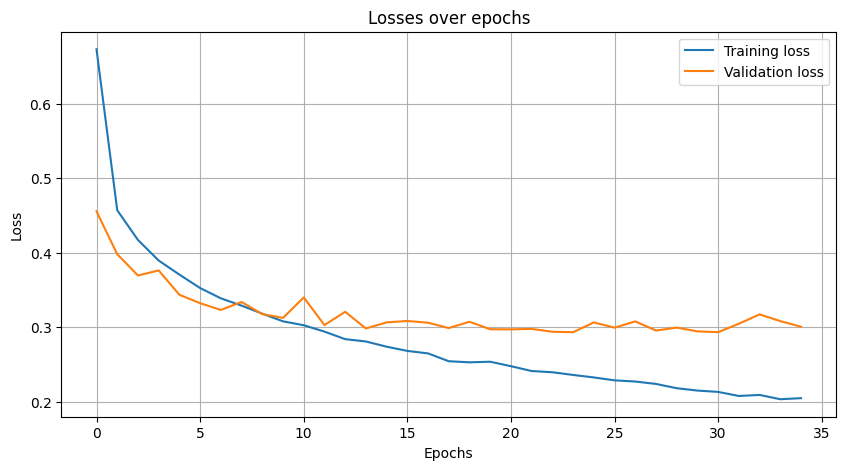

In [13]:

# Main
def main():
    train_dl, val_dl, test_dl = load_data()
    model, device = build_network()
    train_validate(model, device, train_dl, val_dl, config['n_epochs'])

if __name__ == '__main__':
    main()
